<a href="https://colab.research.google.com/github/ZackAkil/crash-course-in-neural-networks/blob/master/completed/Crash_Course_in_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crash Course in Neural Networks 🧠

Neural network are all the rage in machine learning. Although there are a few things you need to know to use them without spiraling down a pit of fustration.


## 1. They can beat Linear Regression

In [0]:
# lets import teh library that will create a dataset for use to use
from sklearn.datasets import make_moons

call the make moons function to to create 400 points of data with the following
```python
X, y = make_moons(n_samples=400, noise=.1, random_state = 42)
```

In [0]:
# WRITE YOUR CODE HERE

X, y = make_moons(n_samples=400, noise=.1, random_state = 42)

In [0]:
# lets import a library for plotting our data 

import matplotlib.pyplot as plt

plot out our data using: 
```python
plt.scatter(X[:,0],X[:,1], c=y)
```

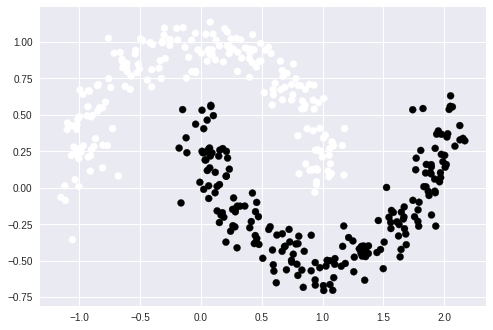

In [4]:
# WRITE YOUR CODE HERE

plt.scatter(X[:,0],X[:,1], c=y)

In [0]:
# lets import a library to split our data into training data and test data

from sklearn.model_selection import train_test_split

plot out our data using: 
```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
```
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
# WRITE YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [0]:
# import a library that will build a linear classification model

from sklearn.linear_model import LogisticRegression

we create a new LogisticRegression model with the following code:
```python
LogisticRegression()
```
give it a varible name like `my_model`.

In [0]:
# WRITE YOUR CODE HERE

line_model = LogisticRegression()


then train it to our data by calling `.fit`:
```python
my_model.fit(X_train, y_train)
```


In [9]:
# WRITE YOUR CODE HERE

line_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


then we can check its performance using our test data with the `.score` function:

```python
my_model.score(X_test, y_test)
```

the score is from 0.0 to 1.0, 1 meaning all correct, 0 meaning none are correct.

In [10]:
# WRITE YOUR CODE HERE

line_model.score(X_test, y_test)

0.8636363636363636

we can also visualise how good our model is by plotting out the data and setting `c` (the colour of the points) to be the prediction from our model. We get predictions from models by calling `.predict`:

```python
plt.scatter(X[:,0], X[:,1], c= YOUR_MODEL.predict(X) )

```


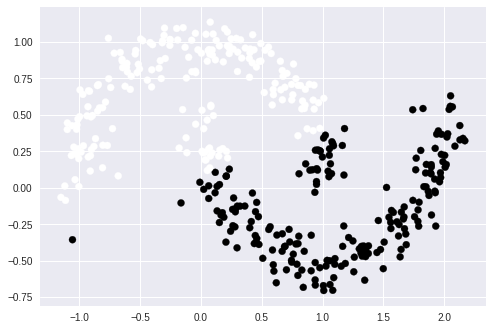

In [11]:
# WRITE YOUR CODE HERE

plt.scatter(X[:,0],X[:,1], c= line_model.predict(X) )

# Now enters the Neural Network 🧠

In [0]:
# we'll import the library

from sklearn.neural_network import MLPClassifier

Similar to before with create a new model with 3 layers of 50 nodes by calling:
```python
MLPClassifier(hidden_layer_sizes=(50,50,50), random_state=42)
```
and assign it to a varible name like `nn_model`

In [0]:
# WRITE YOUR CODE HERE

nn_model = MLPClassifier(max_iter=1000, hidden_layer_sizes=(50,50,50), random_state=42)

Now fit your model to the training data like with the logistic regression model (using `.fit`)

In [14]:
# WRITE YOUR CODE HERE

nn_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

if you get a message like 
```
ConvergenceWarning: Stochastic Optimizer:  reached and the optimization hasn't converged yet.

```

then you can add to your model an `max_iter` to train for longer:

```python
nn_model = MLPClassifier(max_iter=2000)

```



Same agin with looking at the performance using `.score`

In [15]:
# WRITE YOUR CODE HERE

nn_model.score(X_test, y_test)

1.0

Now visualise your model by plotting out its predictions using:

```python
plt.scatter(X[:,0], X[:,1], c= YOUR_MODEL.predict(X) )
```

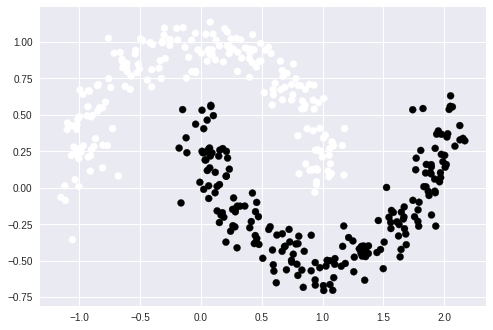

In [16]:
# WRITE YOUR CODE HERE

plt.scatter(X[:,0],X[:,1], c= nn_model.predict(X) )

Congratulations!!!! 🎉🎉🎉 You've trained and neural network to correctly classify data that a normal linear model failed with!!! 
### On to the next thing to know!

# 2 Be VERY cautious of scale
Neural networks are very good when they are in their comfort zone. That zone being between 0 and 1!

In [0]:
# let's create some data and mess with its scale

X2, y2 = make_moons(n_samples=200, noise=.1)
X2[:,1] *= 7000

If we plot out our data with the following code:

```python
plt.scatter(X2[:,0],X2[:,1], c=y2)
```

Its looks the same as before, but **look carefully** at the axis scale: 

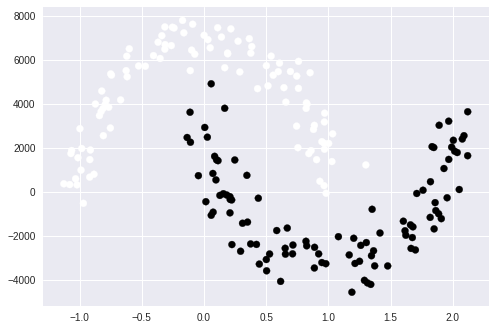

In [18]:
# WRITE YOUR CODE HERE

plt.scatter(X2[:,0],X2[:,1], c=y2)

Let's throw it at our neural network anyway and see what happens.

Same as before we should split our data:

```python

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.33, random_state=42)
```

In [0]:
# WRITE YOUR CODE HERE

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.33, random_state=42)

in the next cell you should create a new `MLPClassifier()`, 
assign it to some varible name like `nn_model2`. 

Then `.fit` it to your new `train2` data,

Then look at the accuracy score of the data using `.score` and your `test` data.  

In [20]:
# WRITE YOUR CODE HERE

nn_model2 = MLPClassifier(max_iter=2000, hidden_layer_sizes=(50,50,50), random_state=42)
nn_model2.fit(X_train2, y_train2)
nn_model2.score(X_test2, y_test2)

0.8484848484848485

Visualise your network prediction using the scatter plot like before.
**Be careful** to use your new model and data

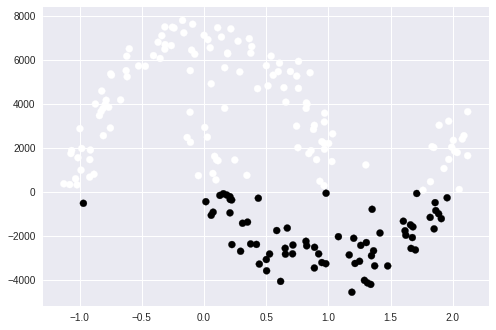

In [21]:
# WRITE YOUR CODE HERE

plt.scatter(X2[:,0],X2[:,1], c= nn_model2.predict(X2) )

You should see that your model isn't performing that well on data :S

Thats becuase the range of value is way way beyond 0 and 1 (neural networks comfort zone). 

## Lets fix that!

In [0]:
# Lets import a library that will scale our data

from sklearn.preprocessing import MinMaxScaler

Create a transformer that will scale our data back to normal with the following:

```python
scaler = MinMaxScaler()

```

In [0]:
# WRITE YOUR CODE HERE

scaler = MinMaxScaler()

Fit the scaler to our data by calling :
```python
scaler.fit(X2)
```
the library will default to scaling our data between 0 and 1

**Note how we only need to scale the `X` data**

In [24]:
# WRITE YOUR CODE HERE

scaler.fit(X2)

MinMaxScaler(copy=True, feature_range=(0, 1))

use the scaler on our poorly scaled data and save the output with the following:
```python

scaled_X_train = scaler.transform(X_train2)
scaled_X_test = scaler.transform(X_test2)
```

In [0]:
# WRITE YOUR CODE HERE

scaled_X_train = scaler.transform(X_train2)
scaled_X_test = scaler.transform(X_test2)

Lets look at our transformed data and **look closely at the axis scale**

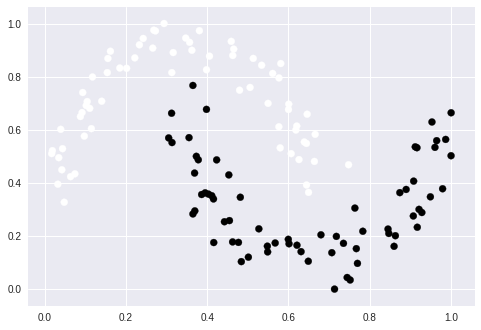

In [26]:
# let view our re-scaled training data

plt.scatter(scaled_X_train[:,0], scaled_X_train[:,1], c=y_train2)

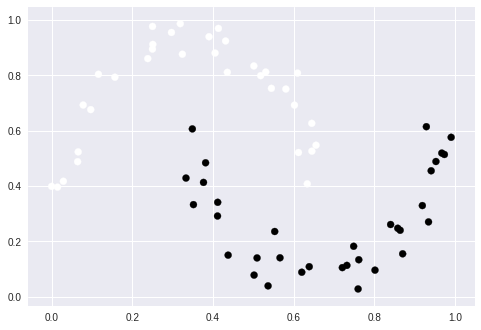

In [27]:
# let view our re-scaled test data

plt.scatter(scaled_X_test[:,0], scaled_X_test[:,1], c=y_test2)

in the next cell you should create a new MLPClassifier(), assign it to some varible name like nn_model3.

Then .fit it to your new re-scaled data as such:
```python
nn_model3.fit(scaled_X_train, y_train2)
```

Then look at the accuracy score of the data using .score and your scaled test data.

In [28]:
# WRITE YOUR CODE HERE

nn_model3 = MLPClassifier(max_iter=2000, hidden_layer_sizes=(50,50,50))
nn_model3.fit(scaled_X_train, y_train2)
nn_model3.score(scaled_X_test, y_test2)

1.0

Visualise your network prediction using the scatter plot like before. **Be careful** to use your new model and data:


the code should look similar to this:
```python
plt.scatter(X2[:,0], X2[:,1], c= nn_model3.predict( scaler.transform(X2) ) )
```

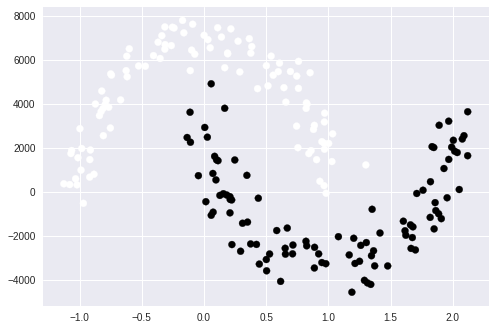

In [29]:
# WRITE YOUR CODE HERE

plt.scatter(X2[:,0], X2[:,1], c= nn_model3.predict( scaler.transform(X2) ) )

Congradulations!!!!  🎉🎉🎉 you have brought and neural newtork back into its comfort zone by scaling it data!!!!

## Onwards to experimenting using training curves

# 3. Know your Training curves

How do you actually work out what size and shape of neural newtrok you should use??

Well its trail and error, mostly error, and your guide is the training and testing curves!!!

In [0]:
# let's get some data

X3, y3 = make_moons(n_samples=100, noise=.2, random_state=42)

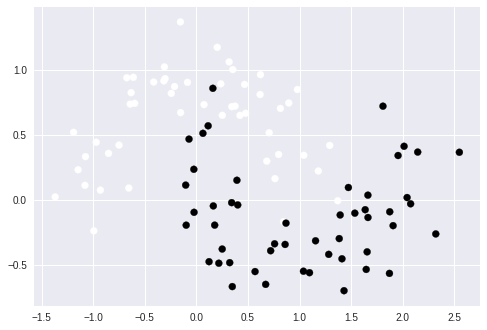

In [31]:
# view it

plt.scatter(X3[:,0], X3[:,1], c=y3)

In [0]:
# split it

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.33, random_state=42)

## Now the fun part

You want **Both** curves to go up 

You can play with the `hidden_layer_sizes` and  number of `epocs`


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


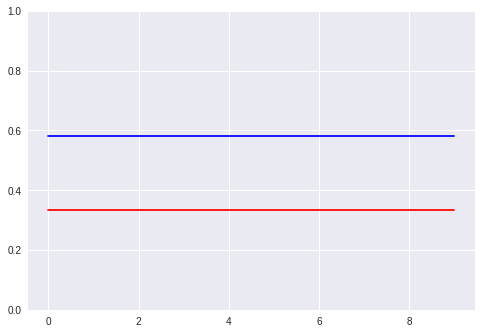

In [34]:
nn_model3 = MLPClassifier(max_iter=1, 
                          warm_start=True, 
                          hidden_layer_sizes=(1,1,1)
                         )

# number of training cycles
epocs = 10

# --------------------------DON'T CHANGE FOLLOWING CODE-------------------------

train_score = []
test_score = []

for i in range(epocs):
  
  # do one epoc of training    
  nn_model3.fit(X_train3, y_train3)
  
  #    
  train_score.append(nn_model3.score(X_train3, y_train3))
  test_score.append(nn_model3.score(X_test3, y_test3))
  
plt.plot(range(epocs), train_score, c='b')
plt.plot(range(epocs), test_score, c='r')
plt.ylim(0, 1)
plt.show()

Hopefully you have gained some intuition aroudn how to use neural networks. 

To learn more advance topic i recommend Andrw Ng's deepleanring courses:

https://www.coursera.org/specializations/deep-learning